<center> <h2> DS 3000 - Fall 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3>NVIDIA GPU Price Prediction</h3> </center>
<center><h4>Batyr Kornusov, Ruizhe Qiu, Tianhao Qu</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

Over the past decade, GPUs have become the staple component for any desktop computer builds. From casual gaming to video editing and AI research, graphics cards have enabled people without the access to professional-grade hardware to accomplish similar goals from the comfort of their homes.

For this project, we have formulated multiple hypotheses on the GPUs' specifications and their correlation with the pricing.

We have collected the specifications and price history for multiple GPUs. In order to predict the GPU pricing, we have built a linear model for predicting GPU pricing. With this model, a user should be able to get the price of a hypothetical future GPU or an existing one n days after its release.



<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

### 1.1 Problem Statement


As we are entering a new era, new technologies such as Artificial Intelligence, Machine Learning are becoming very popular. Most of these new technologies can  one thing - Graphics Processing Unit(GPU). Comparing with CPUs, GPUs are more suitable for Machine Learning in terms of parallel and geometric computing. 

In this project, we will allow the users to inquire the price of certain GPU on certain day. If the day is in history, the project will give the user the actual history price. If a user wishes to see future price of a GPU on a given day, the project will return a predicted price.

We want to learn the relationship between GPU specs and pricing. From there, We will build a regression model that can predict future GPU prices that are currently on the market based on their technical specifications, as well as their price history. Finally, we will combine the price history dataset and our model in order to get the predicted prices according to the input.

### 1.2 Significance of the Problem

While it is very easy for large corporations to purchase dozens of GPUs to solve complex machine learning problems in a short timeframe, high-end hardware remains out of reach for an average user due to budget constraints. For these people, it is very important to find the best GPUs available on the market for the best available price. Our project is designed to help an average user to find the future prices for NVIDIA gpus on the market so that users can pick the right time to purchase the graphics card they want.

One of the greatest features about this project is its expandability. If there are new GPUs coming out in the future, all we have to do is add their specifications and a little bit of price history to the dataset, and it will still be working. In addition to the customer, this project will also be beneficial to the manufacturers and designers when predicting the price trends before launching a GPU into production. The predicted trend can help them decide the MSRP prices for new products, as well as how many GPUs should be produced to meet maximum profits.

### 1.3 Questions/Hypotheses
1.Hypothesis on Memory Size:

  - Null Hypothesis: Memory Size does not have positive relationship with the price of GPU.

  - Alternative Hypothesis: Memory Size has positive relationship with the price of GPU.

2.Hypothesis on CUDA Core Number:

  - Null Hypothesis: CUDA core number does not have positive relationship with the price of GPU.

  - Alternative Hypothesis: CUDA core number has positive relationship with the price of GPU.

3.Hypothesis on Memory BandWidth:
 
  - Null Hypothesis: Memory Bandwidth does not have positive relationship with the price of GPU.

  - Alternative Hypothesis: Memory Bandwidth has positive relationship weith the price of GPU.

4.Hypothesis on Memory Speed:

  - Null Hypothesis: Memory Speed does not have positive relationship with the price of GPU.

  - Alternative Hypothesis: Memory Speed has positive relationship weith the price of GPU.

5.Hypothesis on Graphics Base Clock:

  - Null Hypothesis: Graphics Base Clock does not have positive relationship with the price of GPU.

  - Alternative Hypothesis: Graphics Base Clock has positive relationship with the price of GPU.

6.Question:

Can we use different machine learning algorithm learning to predict the future prices of GPUs according to GPU specs and its price history? Which machine learning algorithm in the following list will perform best in the prediction: LinearRegression, Ridge, Lasso, k-Nearest Neighbor, Support Vector Machine, Decision Tree?


<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition


## Dataset Source

Our dataset include the history price of GPU we selected from 2014 to 2020. From 2014- 2018, our data is from a dataset in https://www.kaggle.com/raczeq/ethereum-effect-pc-parts?select=FACT_GPU_PRICE.csv, which is a dataset collected GPU history price from PCPartPicker, Geizhals, and PriceSpy. We also scrap history price from 2018-2020 by ourselves from https://keepa.com. It is a website shows the history price of products in Amazon. The 3DMark data for each GPU from https://www.passmark.com/. And the spec of each GPU is get directly from https://www.nvidia.com/, which is the official website of Nvidia so it will provide the most accurate information about GPU spec.

In [1]:
import pandas as pd

In [2]:
##Get Dataset From Github
ThreeDMark = pd.read_csv('https://raw.githubusercontent.com/Socrano/Dataset-For-DS3000/main/3DMark.csv', error_bad_lines=False)
price = pd.read_csv('https://raw.githubusercontent.com/Socrano/Dataset-For-DS3000/main/FinalPriceDataSet.csv', error_bad_lines=False)
gpu_spec = pd.read_csv('https://raw.githubusercontent.com/Socrano/Dataset-For-DS3000/main/GPU_Spec.csv', error_bad_lines=False)

After collection, we have three datasets: 3DMark, price, and gpu_spec. The 3DMark dataset contains a raw performance score for each GPU. The price dataset shows the price history for each GPU. The gpu_spec dataset shows the specs of each GPU.

## Feature Introduction

The specs and 3DMark score are fixed for each GPU, and they are all numeric, so we do not have to conduct feature engineering with them. For the price history, we want to use a list of prices for one month as our feature. However, because a list is not allowed to be used as a feature in ML, we decided to build a simple linear model for this feature. This model will take a list prices for one month, and return a predicted price GPU price for the day after. We use this result as our feature, and name it as simple_predicted_price.

  Features
  * Memory size(GB) -- The memory size (a spec) of the GPU
  * CUDA core -- The CUDA core number (a spec) of the GPU
  * Memory Bandwidth(GB/s) -- The Memory Bandwidth (a spec) of the GPU
  * Memory Speed -- The Memory Speed (a spec) of the GPU
  * Graphics Base Clock -- The Graphics Base Clock (a spec) of the GPU
  * VRAM Type(GDDR) -- The VRAM Type(GDDR) (a spec) of the GPU
  * 3DMark(Fire Strike) -- The 3DMark score of the GPU, shows the general performance of the GPU
  * simple_predicted_price -- The simple predicted price according to the price trend from last month

Target
  * target_price -- The price of a GPU for the next day

After the dataset is cleaned and organized, there are 24579 rows × 9 columns.

### 2.2. Data Analysis

## Hypothesis Variable:


  All of our hypothesis is about the relationship between a certain spec and target_price. So the IV is the spec (Memory Size, CUDA Core Number, Memory BandWidth, Memory Speed, and Graphics Base Clock), and the DV is target_price.

## Prediction model

We are going to predict the price of a GPU for the next day by using the features: specs (Memory Size, CUDA Core Number, Memory BandWidth, Memory Speed, and Graphics Base Clock), 3DMark score and the simple_predicted_price, which represents a predicted price, generated from the price trend for the previous month by using a simple linear model. Our target is called target_price, which is the price of the GPU on next day.

## A Supervised Learning Problem

It is a supervised learning problem, and we will use the regression model. We will use the model to get a continuous output.

## Possible Model

We will try LinearRegression, Ridge, Lasso, k-Nearest Neighbor, Support Vector Machine, Decision Tree, and choose three best according to the result. And finally we choose the Ridge, Lasso and k-Nearest Neighbor because their training r squared and testing squared are high and balanceable.

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

In [3]:
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import uniform
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np

### 3.1. Data Wrangling


### Combine three dataset to get a dataframe for the model

In [4]:
#Automated Function doing dataset transformation for every GPU availiable in the GPU-spec dataset.
gpu_item_list = gpu_spec['GPU'].tolist()

#GPU and their corresponding price stored in dictionary.
gpu_price_dict = {}

for gpu in gpu_item_list:
    try:
        temp_list = price[gpu].dropna().tolist()
        gpu_price_dict.update({gpu:temp_list})
    except:
        print('Unable to transform for: ' + gpu)
    
#Some are unable to transform due to dataset discrepancy.

Unable to transform for: GTX 760Ti
Unable to transform for: GTX Titan


In [5]:
#Get the history price list of the recent month
def get_time_list(gpu, i):
    list1 = gpu_price_dict[gpu]
    if i > 29:
        list2 = list1[i-29: i + 1]
    else:
        list2 = list1[0: i + 1]
    return list2;

In [6]:
##A new dataframe with same column as dataframe price
new_price_df = price.copy()
new_price_df.drop(new_price_df.index, inplace=True)
new_price_df = new_price_df.drop("TimeId", axis=1)

In [7]:
##Create the Dataframe for simple ml to get the feature simple_predicted_price
def linear_dataframe(list):
    len_list = []
    for i in range(1, len(list) + 1):
        len_list.append(i)
    price_dict = {"time":len_list, "price" : list}
    price_model_frame = pd.DataFrame(price_dict)
    return price_model_frame

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#Create a simple linear model for prediction and make it easy to be used
def simple_linear_model(list):
    frame = linear_dataframe(list)
    features = frame["time"].values.reshape(-1, 1)
    target = frame["price"]
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)
    model = LinearRegression().fit(X=X_train, y=y_train)
    slope = model.coef_
    slope = slope[0]
    intercept = model.intercept_
    y = slope * (len(list) + 1) + intercept
    return y

In [9]:
##Drop GPU which are unable to transform.
gpu_item_list.remove('GTX 760Ti')
gpu_item_list.remove('GTX Titan')

In [10]:
#Get the dataframe
import numpy as np
for gpu in gpu_item_list:
    for i in range(1, len(gpu_price_dict[gpu])):
        try:
            new_price_df.at[i, gpu] = simple_linear_model(get_time_list(gpu, i))
        except:
            new_price_df.at[i, gpu] = -1

In [11]:

##Get Empty Dataframe of final machine learning
final_df_1 = gpu_spec.copy()
final_df_1 = final_df_1.join(ThreeDMark.set_index("GPU"), on = "GPU")  
final_df_1 = final_df_1.set_index("GPU")
final = final_df_1[0:0]
final = final.assign(simple_predicted_price = [], target_price = [])

In [12]:
##Get the final dataframe work for model.
##Ignore the warning
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for gpu in gpu_item_list:
    
        ##Make the certain line of gpu_spec join all price of this GPU
        df1 = final_df_1.loc[gpu : gpu]
        df1["k"] = 1
        df2 = new_price_df.loc[0:len(new_price_df), [gpu]]
        df2["k"] = 1
        df2 = df2.dropna()
        result = pd.merge(df1, df2, on = "k",  how='outer')
        result = result.drop(columns=['k'])
        result = result.rename(columns={gpu: 'simple_predicted_price'})

        for i in range(0, len(result) - 1):
            result.at[i, "target_price"] = gpu_price_dict[gpu][i + 2]
        final_append = final
        frames = [final_append, result]
        final = pd.concat(frames)


In [13]:
df = final
df = df.reset_index(drop=True)

In [14]:
##A dataframe used for visulization about ptice
df_price = pd.DataFrame(dict([ (key,pd.Series(value)) for key, value in gpu_price_dict.items() ]))

In [15]:
##Original Model Dataframe
df.head()

,Memory size(GB),CUDA core,Memory Bandwidth(GB/s),Memory Speed,Graphics Base Clock,VRAM Type(GDDR),3DMark(Fire Strike),simple_predicted_price,target_price
0,1.0,192,14.0,667.0,954,5,739.0,42.097331,52.020143
1,1.0,192,14.0,667.0,954,5,739.0,71.919117,51.516598
2,1.0,192,14.0,667.0,954,5,739.0,55.627902,50.884026
3,1.0,192,14.0,667.0,954,5,739.0,54.604140,49.497980
4,1.0,192,14.0,667.0,954,5,739.0,55.954795,50.971005


### Delete extra column

In [16]:
##Delete column VRAM Type because they are not suitable to trans to the number to show the character of GPU.
df = df.drop(["VRAM Type(GDDR)"], axis = 1)

### Clean NV Values

In [17]:
##Delete row with na
df = df.dropna()
df.head()

,Memory size(GB),CUDA core,Memory Bandwidth(GB/s),Memory Speed,Graphics Base Clock,3DMark(Fire Strike),simple_predicted_price,target_price
0,1.0,192,14.0,667.0,954,739.0,42.097331,52.020143
1,1.0,192,14.0,667.0,954,739.0,71.919117,51.516598
2,1.0,192,14.0,667.0,954,739.0,55.627902,50.884026
3,1.0,192,14.0,667.0,954,739.0,54.604140,49.497980
4,1.0,192,14.0,667.0,954,739.0,55.954795,50.971005


### Create Feature and Target

In [18]:
##Select the column for features and target
features = df.iloc[:,:7]
target = df.iloc[:,7:8]

### Training and Test Split

In [19]:
##Split for train and test
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

### Preprocess

In [20]:
# preprocess using MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
    
#scale testing and training sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Feature Selection

In [21]:
##RFE
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#select = RFE(DecisionTreeRegressor(random_state=3000),n_features_to_select=3)

In [22]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

##A function help to compare how many features should be selected
feature_number_list = []
train_r_list = []
test_r_list = []
def RFE_feature_selection(n):
    select = RFE(DecisionTreeRegressor(random_state=3000), n_features_to_select=n)
    select.fit(X_train_scaled, y_train)
    X_train_selected = select.transform(X_train_scaled)
    X_test_selected = select.transform(X_test_scaled)
    model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform').fit(X=X_train_selected, y=y_train)
    print("\n\n")
    print("Selected " + str(n) + " features after RFE:")
    for i in range(0, features.columns.size):
        if select.get_support()[i]:
            print("\t" + features.columns[i])
    print("\n")
    print("kNN Regression performance with selected features:")
    print("\tR-squared value for training set: ", r2_score(y_train, model.predict(X_train_selected)))
    print("\tR-squared value for testing set: ", r2_score(y_test, model.predict(X_test_selected)))
    feature_number_list.append(n)
    train_r_list.append(r2_score(y_train, model.predict(X_train_selected)))
    test_r_list.append(r2_score(y_test, model.predict(X_test_selected)))
    return [X_train_selected, X_test_selected]

In [23]:
##compare feature number to select most accurate one
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for i in range (1, 8):
        RFE_feature_selection(i)
    
selection_dict = {"number":feature_number_list,"training r squared":train_r_list,"testing r squared":test_r_list}
selection_df = pd.DataFrame(selection_dict)




Selected 1 features after RFE:
	simple_predicted_price


kNN Regression performance with selected features:
	R-squared value for training set:  0.9803046789134388
	R-squared value for testing set:  0.9701105902620356



Selected 2 features after RFE:
	CUDA core
	simple_predicted_price


kNN Regression performance with selected features:
	R-squared value for training set:  0.9818233660901661
	R-squared value for testing set:  0.9729773801668681



Selected 3 features after RFE:
	Memory size(GB)
	CUDA core
	simple_predicted_price


kNN Regression performance with selected features:
	R-squared value for training set:  0.9822495622541695
	R-squared value for testing set:  0.9739135747032112



Selected 4 features after RFE:
	Memory size(GB)
	CUDA core
	Graphics Base Clock
	simple_predicted_price


kNN Regression performance with selected features:
	R-squared value for training set:  0.982264564321262
	R-squared value for testing set:  0.9738372717617562



Selected 5 features after RFE:

In [24]:
import numpy as np
import matplotlib.pyplot as plt
##A funtion used to draw picture for one element contains two variables
def compare_bar(bars1, bars2, name_list, label1, label2):
    barWidth=0.25
 
    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
 
    # Make the plot
    plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label=label1)
    plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label=label2)
 
    # Add xticks on the middle of the group bars
    plt.xlabel('group', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(bars1))], name_list)
 
    # Create legend & Show graphic

    plt.show()


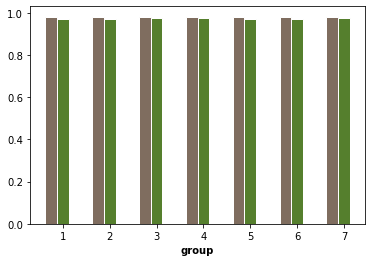

In [25]:
##Compare the r squared for every feature number
##Link: https://github.com/Socrano/Dataset-For-DS3000/blob/main/feature_compare.png
compare_bar(train_r_list, test_r_list, feature_number_list, "training r squared", "testing r squared")

**Interpretation**:

The graph visualizes the R-squared score for each group of features. The group number represents the number of features that this group contains. The brown bar illustrates the R-squared score for the training set, green - R-squared score for the testing set.

Select 7 features will make model become more accurate.

In [26]:
##Select features with features number 7
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    select = RFE(DecisionTreeRegressor(random_state=3000), n_features_to_select=7)
    select.fit(X_train_scaled, y_train)
    X_train_selected, X_test_selected = RFE_feature_selection(7)




Selected 7 features after RFE:
	Memory size(GB)
	CUDA core
	Memory Bandwidth(GB/s)
	Memory Speed
	Graphics Base Clock
	3DMark(Fire Strike)
	simple_predicted_price


kNN Regression performance with selected features:
	R-squared value for training set:  0.9822811427674643
	R-squared value for testing set:  0.9739169026675991


### 3.2. Data Exploration


In [27]:
import seaborn as sns
##A function used to visulization the relationship between spec and price
def spec_graph(column_name, label_name):
    # create and display the regplot
    graph1 = sns.regplot(x=column_name, y="target_price", data = df, scatter_kws={'s':15})

    #specify the title
    title = "The relationship between " + label_name + " and target_price"

    #set the title of the plot
    graph1.set_title(title, size = 16)

    #add labels to the axes  
    graph1.set_xlabel(label_name, size = 16)
    graph1.set_ylabel("Target_price", size = 16)
    
    # create and display the scatter plot
    graph2 = sns.scatterplot(x=column_name, y="target_price", data = df)

    #set the title of the plot
    graph2.set_title(title, size = 16)

    #add labels to the axes  
    graph2.set_xlabel(label_name, size = 16)
    graph2.set_ylabel("Target_price", size = 16)

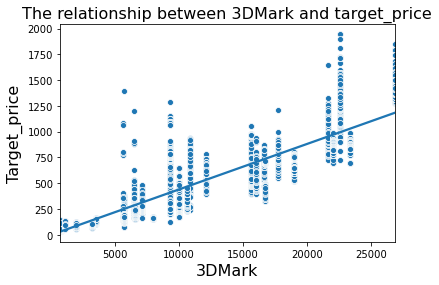

In [28]:
spec_graph('3DMark(Fire Strike)', '3DMark')

**Interpretation**:
The variables for this visulization are Target_price (actual price of GPU) and 3DMark score. This visulization indicates that there is a positive relationship between target_price and 3DMark score, so the target_price increases as the 3DMark score increases.

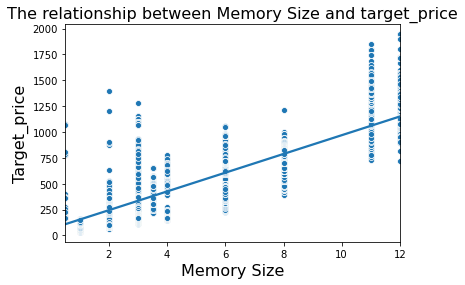

In [29]:
spec_graph('Memory size(GB)', 'Memory Size')

**Interpretation**:
The variables for this visulization are Target_price (actual price of GPU) and Memory Size. This visulization indicates that there is a positive relationship between target_price and Memory Size, so the target_price increases as the Memory Size increases.

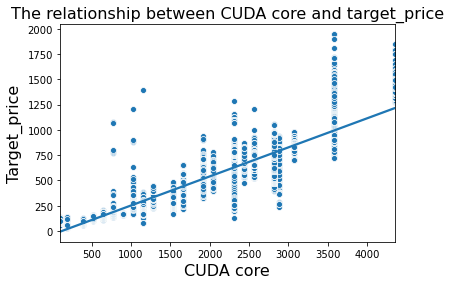

In [30]:
spec_graph('CUDA core', 'CUDA core')

**Interpretation**:
The variables for this visulization are Target_price (actual price of GPU) and CUDA Core Number. This visulization indicates that there is a positive relationship between target_price and CUDA Core Number, so the target_price increases as the CUDA Core Number increases.

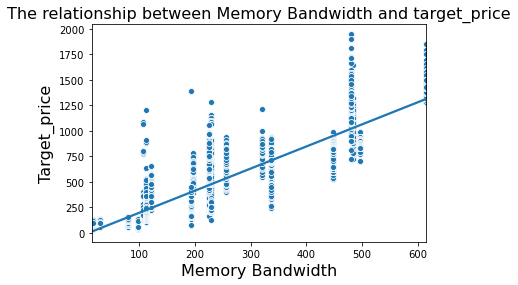

In [31]:
spec_graph('Memory Bandwidth(GB/s)', "Memory Bandwidth")

**Interpretation**:
The variables for this visulization are Target_price (actual price of GPU) and Memory Bandwidth. This visulization indicates that there is a positive relationship between target_price and Memory Bandwidth, so the target_price increases as the Memory Bandwidth increases.

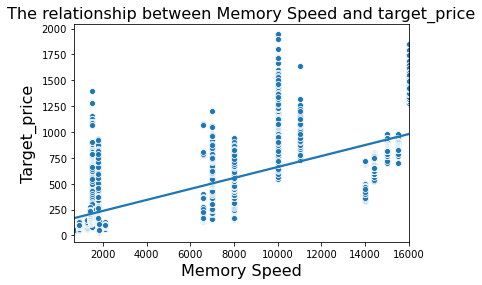

In [32]:
spec_graph('Memory Speed', 'Memory Speed')

**Interpretation**:
The variables for this visulization are Target_price (actual price of GPU) and Memory Speed. This visulization indicates that there is a positive relationship between target_price and Memory Speed, so the target_price increases as the Memory Speed increases.

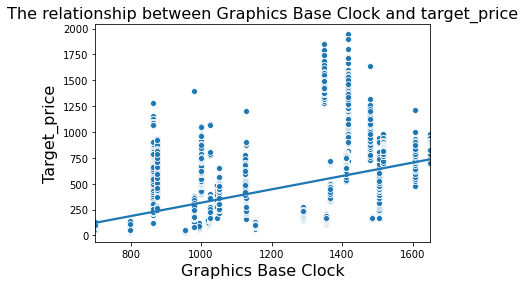

In [33]:
spec_graph('Graphics Base Clock', 'Graphics Base Clock')

**Interpretation**:
The variables for this visulization are Target_price (actual price of GPU) and Graphics Base Clock. This visulization indicates that there is a positive relationship between target_price and Graphics Base Clock, so the target_price increases as the Graphics Base Clock increases.

In [34]:
##A function used to show the price trend of certain GPU
def price_graph(column_name):
    # create and display the regplot
    graph1 = sns.lineplot(x=df_price.index, y=column_name, data = df_price)

    #specify the title
    title = "The relationship between GPU price and time"

    #set the title of the plot
    graph1.set_title(title, size = 16)

    #add labels to the axes  
    graph1.set_xlabel('Time', size = 16)
    graph1.set_ylabel("Price", size = 16)

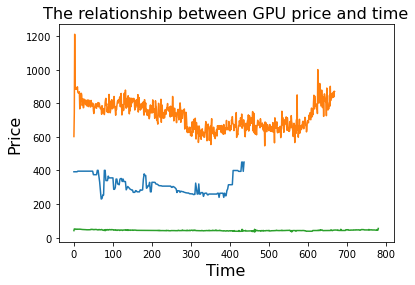

In [35]:
import random
##Select three GPU randomly and show their price trend.
for i in range(0, 3):
    gpu = random.choice(list(df_price.columns))
    price_graph(gpu)

**Interpretation**:
The variables for this visulization are the actual price of a GPU, and time in days after its release. This visulization randomly select three different GPUs and shows their price trend. We can find out if they will fluctuate at certain points in time but will hover around a set normal price trend. It makes our model, used to predict the general price trend, meaningful.

### 3.3. Model Construction


Hypothesis
According to the visualization above, most spec have positive relationship between the price of GPU, but we still need serious test.


In [36]:
from scipy import stats
def test(spec, specName):
    print("Alternative Hypothesis: " + specName + " has positive relationship with the price of GPU.")
    print("Null Hypothesis: " + specName + " does not have positive relationship with the price of GPU.")
    Correlation, pvalue = test_result = stats.spearmanr(df[spec], df["target_price"])

    print("Correlation=" + str(Correlation))
    print("pvalue=" + str(pvalue))
    if (pvalue > 0.05):
        print("The Null Hypothesis cannot be reject")
    else:
        print("The Null Hypothesis can be rejected. There is some relationship between GPU price and " + specName)
        if (Correlation > 0):
            print("Because correlation > 0, it is positive relationship")
        else:
            print("Because correlation < 0, it is negative relationship")

In [37]:
test('Memory size(GB)', 'Memory Size')

Alternative Hypothesis: Memory Size has positive relationship with the price of GPU.
Null Hypothesis: Memory Size does not have positive relationship with the price of GPU.
Correlation=0.8467268432437107
pvalue=0.0
The Null Hypothesis can be rejected. There is some relationship between GPU price and Memory Size
Because correlation > 0, it is positive relationship


In [38]:
test('CUDA core', 'CUDA core')

Alternative Hypothesis: CUDA core has positive relationship with the price of GPU.
Null Hypothesis: CUDA core does not have positive relationship with the price of GPU.
Correlation=0.9656385987181866
pvalue=0.0
The Null Hypothesis can be rejected. There is some relationship between GPU price and CUDA core
Because correlation > 0, it is positive relationship


In [39]:
test('Memory Bandwidth(GB/s)', "Memory Bandwidth")

Alternative Hypothesis: Memory Bandwidth has positive relationship with the price of GPU.
Null Hypothesis: Memory Bandwidth does not have positive relationship with the price of GPU.
Correlation=0.8982087558657023
pvalue=0.0
The Null Hypothesis can be rejected. There is some relationship between GPU price and Memory Bandwidth
Because correlation > 0, it is positive relationship


In [40]:
test('Memory Speed', 'Memory Speed')

Alternative Hypothesis: Memory Speed has positive relationship with the price of GPU.
Null Hypothesis: Memory Speed does not have positive relationship with the price of GPU.
Correlation=0.7001747768665023
pvalue=0.0
The Null Hypothesis can be rejected. There is some relationship between GPU price and Memory Speed
Because correlation > 0, it is positive relationship


In [41]:
test('Graphics Base Clock', 'Graphics Base Clock')

Alternative Hypothesis: Graphics Base Clock has positive relationship with the price of GPU.
Null Hypothesis: Graphics Base Clock does not have positive relationship with the price of GPU.
Correlation=0.5097317559467881
pvalue=0.0
The Null Hypothesis can be rejected. There is some relationship between GPU price and Graphics Base Clock
Because correlation > 0, it is positive relationship


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
##Build estimators dict
estimators = {
    'LinearRegression': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 
    'Ridge': Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001),
    'Lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False),
    'k-Nearest Neighbor': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform'),
    'Support Vector Machine': LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
                          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000000,
                          random_state=None, tol=0.0001, verbose=0),
    'Decision Tree': DecisionTreeRegressor()}

In [43]:
##Test r squared for each model
##We have split the train and test above and we will do the cross-validiation in the following grid-search
model_name = []
model_train_r = []
model_test_r = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for estimator_name, estimator_object in estimators.items():
        
        model_name.append(estimator_name[0:5])
        model = estimator_object.fit(X=X_train_selected, y=y_train)
        model_train_r.append(r2_score(y_train, model.predict(X_train_selected)))
        model_test_r.append(r2_score(y_test, model.predict(X_test_selected)))
        print(estimator_name+":")
        print("\t" + "R-squared value for training set:  ", r2_score(y_train, model.predict(X_train_selected)))
        print("\t" + "R-squared value for testing set:  ", r2_score(y_test, model.predict(X_test_selected)))
        print("\n")

LinearRegression:
	R-squared value for training set:   0.9758328370547106
	R-squared value for testing set:   0.9755261687220939


Ridge:
	R-squared value for training set:   0.9758016011332191
	R-squared value for testing set:   0.9755692336778781


Lasso:
	R-squared value for training set:   0.9752797300826025
	R-squared value for testing set:   0.9754292410297812


k-Nearest Neighbor:
	R-squared value for training set:   0.9822811427674643
	R-squared value for testing set:   0.9739169026675991


Support Vector Machine:
	R-squared value for training set:   0.9441415064862402
	R-squared value for testing set:   0.9450153562232987


Decision Tree:
	R-squared value for training set:   0.9999983478347986
	R-squared value for testing set:   0.9496657601897694




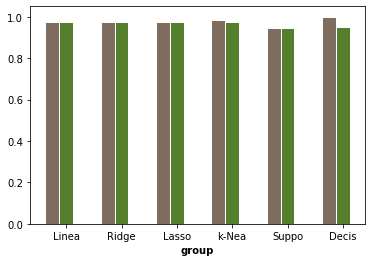

In [44]:
##Link: https://github.com/Socrano/Dataset-For-DS3000/blob/main/estimator_compare.png
compare_bar(model_train_r, model_test_r, model_name, "training r squared", "testing r squared")

**Interpretation**:

The graph visualizes the R-squared score for each estimator in the model. The brown bar illustrates the R-squared score for the training set, green - R-squared score for the testing set.


### 3.4. Model Evaluation


R squared represents the proportion of the variance for a dependent variable.   According to the ouput above, LinearRegression, Ridge, Lasso and k-Nearest Neighbor have R-squared close to one. R squared close to one means most movements of a DV are completely explained by movements in the IV. So it means better performance in some degree Because we want higher and balanceable R-squared
for testing set, we choose Ridge and Lasso. Because we already choose Ridge and Lasso, we do not need to use Linear Regression, and we will choose another alogorithm for our third model. The SVM have more balanceable R squared, but the Knn have higher R squared score for both training and testing. And there is also no big difference between the R squared score of training and testing in Knn. So we select Knn as our final choice.

### 3.5. Model Optimization
* Tune your models using appropriate hyperparameters
* Explain why you are doing this (e.g., to avoid overfitting, etc.)

In [45]:
param_grid_linear = {"alpha":[0.001,0.01,0.1,1,10,100]}
param_grid_knn = {"n_neighbors" : [*range(1, 21, 1)]}

In [46]:
#import GridSearchCV and fit GridSearchCV
from sklearn.model_selection import GridSearchCV
def grid_apply(model_name, algorithm, param_grid):
    grid_search = GridSearchCV(algorithm,param_grid)

    #fit the grid search object on the training data (CV will be performed on this)
    grid_search.fit(X=X_train_selected, y=y_train)

    model_tuned = grid_search

    #result of grid search
    print("For " + model_name + ":")
    print("\tBest parameters: ", grid_search.best_params_)
    print("\tBest cross-validation score: ", grid_search.best_score_)

    #the performance of the best found parameters on the test set
    #this is what you report for the evaluation of your model
    print("\tTest set score: ", grid_search.score(X_test_selected, y_test))
    
    return model_tuned

In [47]:
##LinearRegression_tuned
Ridge_tuned = grid_apply('Ridge', Ridge(), param_grid_linear)
Lasso_tuned = grid_apply('Lasso', Lasso(), param_grid_linear)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    Knn_tuned = grid_apply('Knn', KNeighborsRegressor(), param_grid_knn)

For Ridge:
	Best parameters:  {'alpha': 0.01}
	Best cross-validation score:  0.9758397091205409
	Test set score:  0.9755269604198656
For Lasso:
	Best parameters:  {'alpha': 0.01}
	Best cross-validation score:  0.975842633392692
	Test set score:  0.9755302884221789
For Knn:
	Best parameters:  {'n_neighbors': 19}
	Best cross-validation score:  0.9763635822452411
	Test set score:  0.9778704780474032


For Ridge and Lasso, the default alpha is 1 and after tunning the alpha is 0.1. It decreases so the tunning for Ridge and Lasso increase the model complexicity and reduce the underfitting.

For Knn, the default neighbors number is 5 and after tunning the number is 19. It increase so the tunning for Knn make it have smoother decision boundaries which mean lower variance but increased bias.

### 3.6. Model Testing
* Test your tuned algorithms using your **testing set**

In [48]:
final_model_name = []
final_model_train = []
final_model_test = []

##First model is for Ridge
model1 = Ridge_tuned.fit(X=X_train_selected, y=y_train)
R_train1 = r2_score(y_train, model1.predict(X_train_selected))
R_test1 = r2_score(y_test, model1.predict(X_test_selected))  
print('Ridge:')
print('\tR-squared value for training set: ' + str(R_train1))
print('\tR-squared value for testing set: ' + str(R_test1))
final_model_name.append("Ridge")
final_model_train.append(R_train1)
final_model_test.append(R_test1)
##Second model is for Lasso
model2 = Lasso_tuned.fit(X=X_train_selected, y=y_train)
R_train2 = r2_score(y_train, model2.predict(X_train_selected))
R_test2 = r2_score(y_test, model2.predict(X_test_selected))  
print('Lasso:')
print('\tR-squared value for training set: ' + str(R_train2))
print('\tR-squared value for testing set: ' + str(R_test2))
final_model_name.append("Lasso")
final_model_train.append(R_train2)
final_model_test.append(R_test2)
##Third model is for Knn
model3 = Knn_tuned.fit(X=X_train_selected, y=y_train)
R_train3 = r2_score(y_train, model3.predict(X_train_selected))
R_test3 = r2_score(y_test, model3.predict(X_test_selected))  
print('Knn:')
print('\tR-squared value for training set: ' + str(R_train3))
print('\tR-squared value for testing set: ' + str(R_test3))
final_model_name.append("Knn")
final_model_train.append(R_train3)
final_model_test.append(R_test3)

Ridge:
	R-squared value for training set: 0.9758328337634025
	R-squared value for testing set: 0.9755269604198656
Lasso:
	R-squared value for training set: 0.9758326520917058
	R-squared value for testing set: 0.9755302884221789
Knn:
	R-squared value for training set: 0.9787978080008335
	R-squared value for testing set: 0.9778704780474032


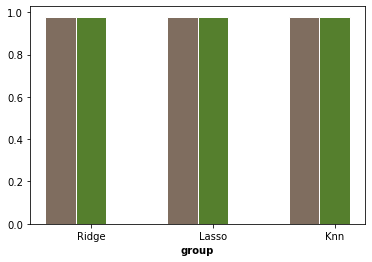

In [49]:
##Link: https://github.com/Socrano/Dataset-For-DS3000/blob/main/model_compare.png
compare_bar(final_model_train, final_model_test, final_model_name, "training r squared", "testing r squared")

**Interpretation**:

The graph visualizes the R-squared score for each model. The brown bar illustrates the R-squared score for the training set, green - R-squared score for the testing set.

### 3.7 Specific Use For Model And Dataset

In this part, we want to build a function to make our model be easier to use. This function has three input. First one is the GPU you want to get the history price of predict price. Second one is the day you want to get price after on sale. The thrid one is the model you want to choose to predict. This function combines our dataset and our model. If you give a day that existed in the history, the function will give you a history price of the given GPU on that day. If the day you give is in future, this function will use the model to predict the price trend for the next day until it reaches the day you want. And then, it will return the predicted price.

In [50]:
##Helper function to append/develop the price list
def append_list_with_prediction(gpu, price_list, model):
    empty_feature_df = features.copy()
    empty_feature_df.drop(empty_feature_df.index, inplace=True)
    spec = gpu_spec.loc[gpu_spec["GPU"] == gpu]
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        empty_feature_df = empty_feature_df.append(pd.Series(), ignore_index=True)

    ##Add spec for feature
    for i in range(0, 5):
        empty_feature_df.iat[0, i] = spec.iat[0, i + 1]

    ##add 3dMark for feature
    empty_feature_df.iat[0, 5] = ThreeDMark.loc[ThreeDMark["GPU"] == gpu]["3DMark(Fire Strike)"]

    ##Add simple_predict_price
    if (len(price_list) < 30):
        empty_feature_df.iat[0, 6] = simple_linear_model(price_list)
    else:
        predict_list  = [price_list[i] for i in range(len(price_list)-30, len(price_list))]
        empty_feature_df.iat[0, 6] = simple_linear_model(predict_list)

  
    ##Preprocess and select the input to get output
    scaler.fit(X_train)
    empty_feature_df_scaled = scaler.transform(empty_feature_df)
    empty_feature_df_selected = select.transform(empty_feature_df_scaled)
    if model == model2:
        price_list.append(model.predict(empty_feature_df_selected)[0])
    else:
        price_list.append(model.predict(empty_feature_df_selected)[0][0])
    
    return price_list

In [51]:
##gpu is the GPU you want to predict or search, day is the day after the gpu is on sale
def use(gpu, day, model):
    price_list = gpu_price_dict[gpu].copy()
    ##Get the existed price
    if (day <= len(price_list)):
        return price_list[day - 1]
    ##Get predicted price
    else:
        for i in range(len(price_list), day - 1):
            price_list = append_list_with_prediction(gpu, price_list, model)


    return price_list[len(price_list) - 1]


In [52]:
#model1 = Ridge, model2 = Lasso, model3 = knn
#Example For History Price
use("GT 710", 1400, model3)

44.82291636157895

In [53]:
#model1 = Ridge, model2 = Lasso, model3 = knn
#Example For Predict Price
use("RTX 2080", 1000, model3)

830.8221052631578

<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
### **Summary**
We have gathered three different datasets containing GPU 3DMark benchmark scores, their price history, and hardware specifications. From there, we have made several hypotheses to check the correlation between each major spec of a GPU and its price. We have created a prediction model that analyzes a GPUs specs and the price trend in a month in order to predict its price for each day after continuously.

We selected 7 different specs as features for our model after running a recursive feature elimination, with each additional feature improving our R-squared value.

Afterwards, we have explored the correlation between each spec and GPU pricing. We have tested each hypothesis for each spec of a GPU and found a positive correlation between each GPU spec and price.

We compared the training and testing R-squared value for each estimator, choosing 3 best ones in order to optimize our model. After tuning the model, we tested it using the three chosen estimators.

The model can now be used to predict the price of a hypothetical or existing GPU x number of days after its release.

### **Interpretation**
To test our hypotheses, we used the Spearman correlation coefficient to get the p-value for each feature. As a result of this test, we revealed a positive correlation between each feature and the GPU price. For each hypothesis, we have rejected the null hypothesis, as in every case the p-value was < 0.05.

For this project, we used LinearRegression, Ridge, Lasso, k-NearestNeighbor, Support Vector Machine, and Decision Tree in order to predict GPU pricing. 

Out of these, Ridge and Lasso had the highest R-squared score for testing set and thus were chosen for model optimization. In addition, we used the k-Nearest Neighbor. After tuning all three, we have reached a sufficient test score of 0.97+, and began testing our tuned algorithms on our testing set.

Each one of the 3 estimators show a hihg R-squared value for the training and testing sets. (0.98+ on training, and 0.97+ on testing)

Using these, we are able to extrapolate the existing data (GPU specs) and predict future prices for a given graphics card.

### **Future Work**

Because our project is expandable and can accept GPUs that do not yet exist, we can use this model to extrapolate on the given specs of the GPU, and predict its potential pricing.

With the recent release of the NVIDIA's RTX 3000 line of graphics cards, we are able to use this model to calculate future potential price trends for the new lineup. In addition, this model should also be valid when used with AMD graphics cards. In that case, the CUDA core feature should be replaced with the corresponding AMD core counterpart numbers.

And we will also try to use different dataframe format to represent the history price in different way, like use more columns to present history price at different day instead of showing simple_predicted_price.


<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS
* Batyr: Discussion, final review.
* Ruizhe: Results (mainly about model part and data organization). Method. Final review.
* Tianhao: Results (More data collection). Introduction. Final review.  